In [1]:
import pandas as pd

#从网络读入数据
df = pd.read_excel(r'https://www.gairuo.com/file/data/dataset/team.xlsx')
#查看前5条
df.head()
#查看尾部5条
df.tail()
#随机查看n条
df.sample(10)

#查看行数和列数
df.shape
#查看各字段类型
df.dtypes
#显示数据行和列名
df.axes
#列名
df.columns

#查看索引、数据类型和内存信息
df.info()
#查看数值类型列的汇总统计
df.describe()

#建立索引
df.set_index('name',inplace=True)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    100 non-null    object
 1   team    100 non-null    object
 2   Q1      100 non-null    int64 
 3   Q2      100 non-null    int64 
 4   Q3      100 non-null    int64 
 5   Q4      100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64
Arry,C,36,37,37,57
Ack,A,57,60,18,84
Eorge,C,93,96,71,78
Oah,D,65,49,61,86
...,...,...,...,...,...
Gabriel,C,48,59,87,74
Austin7,C,21,31,30,43
Lincoln4,C,98,93,1,20


In [5]:
#数据选取

#选择列
df['Q1']
df.Q1

#选择多列
df[['Q1','Q2']]
df.loc[:,['Q1','team']]

,Q1,team
name,,
Liver,89,E
Arry,36,C
Ack,57,A
Eorge,93,C
Oah,65,D
...,...,...
Gabriel,48,C
Austin7,21,C
Lincoln4,98,C


In [6]:
#选择行

df[df.index=='Liver']
df[0:3]
df[0:10:2]
df.iloc[:10]

,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64
Arry,C,36,37,37,57
Ack,A,57,60,18,84
Eorge,C,93,96,71,78
Oah,D,65,49,61,86
Harlie,C,24,13,87,43
Acob,B,61,95,94,8
Lfie,A,9,10,99,37
Reddie,D,64,93,57,72


In [7]:
#指定行和列
df.loc['Ben','Q1':'Q4']   #只看Ben的四个季度成绩

Q1    21
Q2    43
Q3    41
Q4    74
Name: Ben, dtype: object

In [11]:
#条件选择
df[df.Q1>90]
df[df.team=='C']
df[df.index=='Oscar']
df[(df['Q1']>90)&(df['team']=='C')]

,team,Q1,Q2,Q3,Q4
name,,,,,
Eorge,C,93,96,71,78
Alexander,C,91,76,26,79
Lincoln4,C,98,93,1,20


In [13]:
#排序
df.sort_values(by='Q1')
df.sort_values(by='Q1',ascending=False)
df.sort_values(by=['team','Q1'],ascending=[True,False])

,team,Q1,Q2,Q3,Q4
name,,,,,
Aaron,A,96,75,55,8
Henry,A,91,15,75,17
Nathan,A,87,77,62,13
Dylan,A,86,87,65,20
Blake,A,78,23,93,9
...,...,...,...,...,...
Eli,E,11,74,58,91
Jude,E,8,45,13,65
Rory9,E,8,12,58,27


In [31]:
#分类聚合
df.groupby('team').sum()
df.groupby('team').mean()
df.groupby('team').agg({'Q1':'sum',
                        'Q2':'count',
                        'Q3':'mean',
                        'Q4':max})

,Q1,Q2,Q3,Q4
team,,,,
A,1066,17,51.470588,97
B,975,22,54.636364,99
C,1056,22,48.545455,98
D,860,19,65.315789,99
E,963,20,44.050000,98


In [92]:
#数据转换
df.groupby('team').sum().T
df.groupby('team').sum().stack()
df.groupby('team').sum().unstack()

       team
Q1     A       1066
       B        975
       C       1056
       D        860
       E        963
Q2     A        639
       B       1218
       C       1194
       D       1191
       E       1013
Q3     A        875
       B       1202
       C       1068
       D       1241
       E        881
Q4     A        783
       B       1136
       C       1127
       D       1199
       E       1033
total  A       3363
       B       4531
       C       4445
       D       4491
       E       3890
dtype: int64

In [2]:
#增加列
# df['total']=df.Q1+df.Q2+df.Q3+df.Q4
# df['total']=df.sum(axis=1)
df['tatal']=df.loc[:,'Q1':'Q4'].apply(lambda x:sum(x),axis=1)
df

,team,Q1,Q2,Q3,Q4,tatal
name,,,,,,
Liver,E,89,21,24,64,198
Arry,C,36,37,37,57,167
Ack,A,57,60,18,84,219
Eorge,C,93,96,71,78,338
Oah,D,65,49,61,86,261
...,...,...,...,...,...,...
Gabriel,C,48,59,87,74,268
Austin7,C,21,31,30,43,125
Lincoln4,C,98,93,1,20,212


In [13]:
#统计函数
df.mean()
df.mean(1)
#返回列与列之间的相关系数
df.corr()
df.count()
df.min()
df.median()
df.std()
df.var()
df.mode()

,team,Q1,Q2,Q3,Q4,tatal
0,B,9.0,34,87.0,68.0,198.0
1,C,NaN,38,NaN,NaN,NaN


<AxesSubplot:ylabel='Q1'>

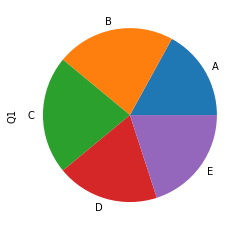

In [35]:
#绘图
# # df['Q1'].plot()
# #折线图
# df.loc['Ben','Q1':'Q4'].plot()
# #柱状图
# df.loc['Ben','Q1':'Q4'].plot.bar()
# #横向柱状图
# df.loc['Ben','Q1':'Q4'].plot.barh()
# df.groupby('team').sum().T.plot()
#饼图
df.groupby('team').count().Q1.plot.pie()

In [ ]:
#导出
# 导出为Excel
df.to_excel('team-done.xlsx')
#导出为Csv
df.to_csv('team-done.csv')